# Cyber Operations Data

The Council of Foreign Relations tracks known cyber operations and threat actor groups at https://www.cfr.org/interactive/cyber-operations#CyberOperations

The data _categorizes all instances of publicly known state-sponsored cyber activity since 2005_. Only incidents in which the threat actor is suspected to be affiliated with a nation-state are included. Only incidents where states and their proxies conduct cyber operations in pursuit of their foreign policy interests are included. Furthermore, state-sponsored incidents generally have the most accurate and comprehensive reporting. 

Data sources include: Florian Roth’s APT Groups and Operations spreadsheet, the Center for Strategic and International Studies’ list of significant cyber events, and Kaspersky Lab’s Targeted Cyberattacks Logbook

Attributinon is tricky and is derived using a combination of technical data, open-source information, and an understanding of the threat actor’s foreign policy priorities.

No claims are made that the data contained within the tracker is entirely complete. There is a bias toward over-reporting incidents or threat actors affecting countries where English is widely spoken and published. Classified and proprietary information about incidents are not included. Incident reporting takes  time--some incidents get an attribution way after the operation becomes public. Some incidents may be missing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#you need the inline comment
import matplotlib
%matplotlib inline

#correct statement to set options:
pd.set_option('display.max_columns', 200)

matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
data_file = 'cyber-operations-incidents.csv'

first = pd.read_csv(data_file)
first.head(5)

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
0,Targeting of Visma,2019-02-06,Believed to be the work of APT 10.,Hackers used malware from the dark web to targ...,NaN,Visma,China,Espionage,Private sector,https://www.recordedfuture.com/apt10-cyberespi...,https://www.reuters.com/article/us-china-cyber...,https://www.nytimes.com/2019/02/18/technology/...
1,U.S. Cyber Command offensive attack of Russian...,2019-02-27,U.S. Cyber Command,"In November 2018, the U.S. Cyber Command launc...",NaN,Russia,United States,Denial of service,Government,https://www.washingtonpost.com/world/national-...,https://www.nytimes.com/2018/10/23/us/politics...,NaN
2,Targeting of universities' maritime military s...,2019-03-05,Believed to be the work of Leviathan.,Chinese hackers targeted twenty-seven universi...,NaN,"University of Hawaii, University of Washington...",China,Espionage,"Civil society, Private sector",https://www.wsj.com/articles/chinese-hackers-t...,http://fortune.com/2019/03/05/chinese-hackers-...,NaN
3,Whitefly,2019-03-06,Believed to be behind the Singapore health-car...,This threat actor has been active since mid-20...,NaN,"Singapore, Russia, United Kingdom",NaN,NaN,"Government, Private sector",https://www.securityweek.com/massive-singapore...,https://www.symantec.com/blogs/threat-intellig...,https://www.reuters.com/article/singapore-cybe...
4,2019 Indonesian elections,2019-03-12,Believed to be the work of Russian and Chinese...,Senior Indonesian election officials accused C...,NaN,Indonesia,"China, Russian Federation",Espionage,Government,https://www.bloomberg.com/news/articles/2019-0...,https://www.reuters.com/article/us-indonesia-e...,NaN


In [3]:
first.shape

(313, 12)

In [4]:
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 12 columns):
Title           313 non-null object
Date            309 non-null object
Affiliations    192 non-null object
Description     313 non-null object
Response        59 non-null object
Victims         309 non-null object
Sponsor         279 non-null object
Type            304 non-null object
Category        312 non-null object
Sources_1       313 non-null object
Sources_2       246 non-null object
Sources_3       146 non-null object
dtypes: object(12)
memory usage: 29.4+ KB


## Clean up data, Populate fields

In [5]:
first.drop(['Sources_1','Sources_2','Sources_3'],axis=1)
first['Year'] = pd.to_datetime(first['Date']) 
first['Year'] = pd.DatetimeIndex(first['Date']).year

In [6]:
first.Sponsor.unique()

array(['China', 'United States', nan, 'China, Russian Federation',
       'Iran (Islamic Republic of)', 'Russian Federation',
       'United Arab Emirates', 'Saudi Arabia',
       "Korea (Democratic People's Republic of)", 'Pakistan', 'Lebanon',
       'Mexico', 'Netherlands', 'United Kingdom', 'Israel', 'Ethiopia',
       'Panama', 'Kazakhstan', 'Vietnam', 'Spain', 'France',
       'Korea (Republic of)', 'United Kingdom, United States', 'India',
       'United States, Israel', 'Israel, United States',
       'Taiwan, United States'], dtype=object)

In [7]:
# True in this case means NaN
first.Sponsor.isna().value_counts()

False    279
True      34
Name: Sponsor, dtype: int64

In [8]:
first.Sponsor.replace(np.nan,'Unknown', inplace=True)
first

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3,Year
0,Targeting of Visma,2019-02-06,Believed to be the work of APT 10.,Hackers used malware from the dark web to targ...,NaN,Visma,China,Espionage,Private sector,https://www.recordedfuture.com/apt10-cyberespi...,https://www.reuters.com/article/us-china-cyber...,https://www.nytimes.com/2019/02/18/technology/...,2019.0
1,U.S. Cyber Command offensive attack of Russian...,2019-02-27,U.S. Cyber Command,"In November 2018, the U.S. Cyber Command launc...",NaN,Russia,United States,Denial of service,Government,https://www.washingtonpost.com/world/national-...,https://www.nytimes.com/2018/10/23/us/politics...,NaN,2019.0
2,Targeting of universities' maritime military s...,2019-03-05,Believed to be the work of Leviathan.,Chinese hackers targeted twenty-seven universi...,NaN,"University of Hawaii, University of Washington...",China,Espionage,"Civil society, Private sector",https://www.wsj.com/articles/chinese-hackers-t...,http://fortune.com/2019/03/05/chinese-hackers-...,NaN,2019.0
3,Whitefly,2019-03-06,Believed to be behind the Singapore health-car...,This threat actor has been active since mid-20...,NaN,"Singapore, Russia, United Kingdom",Unknown,NaN,"Government, Private sector",https://www.securityweek.com/massive-singapore...,https://www.symantec.com/blogs/threat-intellig...,https://www.reuters.com/article/singapore-cybe...,2019.0
4,2019 Indonesian elections,2019-03-12,Believed to be the work of Russian and Chinese...,Senior Indonesian election officials accused C...,NaN,Indonesia,"China, Russian Federation",Espionage,Government,https://www.bloomberg.com/news/articles/2019-0...,https://www.reuters.com/article/us-indonesia-e...,NaN,2019.0
5,Global hijacking of domain name system (DNS),2019-01-09,Suspected to be the work of Iranian actors.,An unknown actor with a connection to Iran hij...,NaN,"United States, South Korea, Canada, Lebanon , ...",Iran (Islamic Republic of),Espionage,Private sector,https://www.wired.com/story/iran-dns-hijacking/,https://www.fireeye.com/blog/threat-research/2...,https://blog.talosintelligence.com/2018/11/dns...,2019.0
6,Attempted attack on the Democratic National Co...,2019-01-18,Suspected to be the work of the Dukes.,The DNC alleged it was targeted in an unsucces...,NaN,Democratic National Committee,Russian Federation,Espionage,Civil society,https://www.wsj.com/articles/dnc-says-russia-t...,https://www.axios.com/democrats-dnc-hacking-ru...,https://www.nytimes.com/2019/01/18/technology/...,2019.0
7,Attempted attack on the Democratic National Co...,2019-01-18,Suspected to be the work of the Dukes.,The DNC alleged it was targeted in an unsucces...,NaN,Democratic National Committee,Russian Federation,Espionage,Civil society,https://www.wsj.com/articles/dnc-says-russia-t...,https://www.axios.com/democrats-dnc-hacking-ru...,https://www.nytimes.com/2019/01/18/technology/...,2019.0
8,Cyber espionage by the United Arab Emirates (UAE),2019-01-30,Believed to be the work of the UAE government.,Former U.S. government intelligence operatives...,NaN,"Qatar, Turkey, Yemen",United Arab Emirates,Espionage,"Government, Civil society",https://www.reuters.com/article/us-usa-spying-...,https://www.nbcnews.com/tech/security/how-uae-...,NaN,2019.0
9,Targeting of U.S. and European think tanks,2019-01-31,Believed to be the work of Fancy Bear.,Hackers set up fake login pages or sent spoof ...,NaN,Center for Strategic and International Studies...,Russian Federation,Espionage,Private sector,https://www.cnn.com/2019/01/30/politics/fancy-...,https://www.newsweek.com/russian-military-inte...,NaN,2019.0


In [9]:
# True in this case means NaN
first.Sponsor.isna().value_counts()

False    313
Name: Sponsor, dtype: int64

In [10]:
first.Type.unique()

array(['Espionage', 'Denial of service', nan, 'Doxing', 'Sabotage',
       'Data destruction', 'Defacement'], dtype=object)

In [11]:
#False means no nulls
first.Type.isna().value_counts()

False    304
True       9
Name: Type, dtype: int64

In [12]:
first.Type.replace(np.nan,'Uncateogrized', inplace=True)
first

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3,Year
0,Targeting of Visma,2019-02-06,Believed to be the work of APT 10.,Hackers used malware from the dark web to targ...,NaN,Visma,China,Espionage,Private sector,https://www.recordedfuture.com/apt10-cyberespi...,https://www.reuters.com/article/us-china-cyber...,https://www.nytimes.com/2019/02/18/technology/...,2019.0
1,U.S. Cyber Command offensive attack of Russian...,2019-02-27,U.S. Cyber Command,"In November 2018, the U.S. Cyber Command launc...",NaN,Russia,United States,Denial of service,Government,https://www.washingtonpost.com/world/national-...,https://www.nytimes.com/2018/10/23/us/politics...,NaN,2019.0
2,Targeting of universities' maritime military s...,2019-03-05,Believed to be the work of Leviathan.,Chinese hackers targeted twenty-seven universi...,NaN,"University of Hawaii, University of Washington...",China,Espionage,"Civil society, Private sector",https://www.wsj.com/articles/chinese-hackers-t...,http://fortune.com/2019/03/05/chinese-hackers-...,NaN,2019.0
3,Whitefly,2019-03-06,Believed to be behind the Singapore health-car...,This threat actor has been active since mid-20...,NaN,"Singapore, Russia, United Kingdom",Unknown,Uncateogrized,"Government, Private sector",https://www.securityweek.com/massive-singapore...,https://www.symantec.com/blogs/threat-intellig...,https://www.reuters.com/article/singapore-cybe...,2019.0
4,2019 Indonesian elections,2019-03-12,Believed to be the work of Russian and Chinese...,Senior Indonesian election officials accused C...,NaN,Indonesia,"China, Russian Federation",Espionage,Government,https://www.bloomberg.com/news/articles/2019-0...,https://www.reuters.com/article/us-indonesia-e...,NaN,2019.0
5,Global hijacking of domain name system (DNS),2019-01-09,Suspected to be the work of Iranian actors.,An unknown actor with a connection to Iran hij...,NaN,"United States, South Korea, Canada, Lebanon , ...",Iran (Islamic Republic of),Espionage,Private sector,https://www.wired.com/story/iran-dns-hijacking/,https://www.fireeye.com/blog/threat-research/2...,https://blog.talosintelligence.com/2018/11/dns...,2019.0
6,Attempted attack on the Democratic National Co...,2019-01-18,Suspected to be the work of the Dukes.,The DNC alleged it was targeted in an unsucces...,NaN,Democratic National Committee,Russian Federation,Espionage,Civil society,https://www.wsj.com/articles/dnc-says-russia-t...,https://www.axios.com/democrats-dnc-hacking-ru...,https://www.nytimes.com/2019/01/18/technology/...,2019.0
7,Attempted attack on the Democratic National Co...,2019-01-18,Suspected to be the work of the Dukes.,The DNC alleged it was targeted in an unsucces...,NaN,Democratic National Committee,Russian Federation,Espionage,Civil society,https://www.wsj.com/articles/dnc-says-russia-t...,https://www.axios.com/democrats-dnc-hacking-ru...,https://www.nytimes.com/2019/01/18/technology/...,2019.0
8,Cyber espionage by the United Arab Emirates (UAE),2019-01-30,Believed to be the work of the UAE government.,Former U.S. government intelligence operatives...,NaN,"Qatar, Turkey, Yemen",United Arab Emirates,Espionage,"Government, Civil society",https://www.reuters.com/article/us-usa-spying-...,https://www.nbcnews.com/tech/security/how-uae-...,NaN,2019.0
9,Targeting of U.S. and European think tanks,2019-01-31,Believed to be the work of Fancy Bear.,Hackers set up fake login pages or sent spoof ...,NaN,Center for Strategic and International Studies...,Russian Federation,Espionage,Private sector,https://www.cnn.com/2019/01/30/politics/fancy-...,https://www.newsweek.com/russian-military-inte...,NaN,2019.0


In [13]:
#False means no nulls
first.Type.isna().value_counts()

False    313
Name: Type, dtype: int64

In [14]:
first.Category.unique()

array(['Private sector', 'Government', 'Civil society, Private sector',
       'Government, Private sector', 'Civil society',
       'Government, Civil society',
       'Government, Civil society, Private sector',
       'Private sector, Government', 'Military, Civil society',
       'Government, Private sector, Civil society', nan,
       'Military, Government', 'Government, Military', 'Military',
       'Civil society, Government',
       'Government, Military, Private sector', 'Military, Private sector',
       'Private sector, Military', 'Private sector, Civil society'],
      dtype=object)

In [15]:
first.Category.isna().value_counts()

False    312
True       1
Name: Category, dtype: int64

In [16]:
first[first.Category.isna()]

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3,Year
99,Targeting of U.S. electric companies,2017-10-10,NaN,A threat actor targeted U.S. electric companie...,NaN,United States,Korea (Democratic People's Republic of),Espionage,NaN,https://www.fireeye.com/blog/threat-research/2...,NaN,NaN,2017.0


In [17]:
first.loc[first.Category.isna(),'Category']="Private sector"
first

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3,Year
0,Targeting of Visma,2019-02-06,Believed to be the work of APT 10.,Hackers used malware from the dark web to targ...,NaN,Visma,China,Espionage,Private sector,https://www.recordedfuture.com/apt10-cyberespi...,https://www.reuters.com/article/us-china-cyber...,https://www.nytimes.com/2019/02/18/technology/...,2019.0
1,U.S. Cyber Command offensive attack of Russian...,2019-02-27,U.S. Cyber Command,"In November 2018, the U.S. Cyber Command launc...",NaN,Russia,United States,Denial of service,Government,https://www.washingtonpost.com/world/national-...,https://www.nytimes.com/2018/10/23/us/politics...,NaN,2019.0
2,Targeting of universities' maritime military s...,2019-03-05,Believed to be the work of Leviathan.,Chinese hackers targeted twenty-seven universi...,NaN,"University of Hawaii, University of Washington...",China,Espionage,"Civil society, Private sector",https://www.wsj.com/articles/chinese-hackers-t...,http://fortune.com/2019/03/05/chinese-hackers-...,NaN,2019.0
3,Whitefly,2019-03-06,Believed to be behind the Singapore health-car...,This threat actor has been active since mid-20...,NaN,"Singapore, Russia, United Kingdom",Unknown,Uncateogrized,"Government, Private sector",https://www.securityweek.com/massive-singapore...,https://www.symantec.com/blogs/threat-intellig...,https://www.reuters.com/article/singapore-cybe...,2019.0
4,2019 Indonesian elections,2019-03-12,Believed to be the work of Russian and Chinese...,Senior Indonesian election officials accused C...,NaN,Indonesia,"China, Russian Federation",Espionage,Government,https://www.bloomberg.com/news/articles/2019-0...,https://www.reuters.com/article/us-indonesia-e...,NaN,2019.0
5,Global hijacking of domain name system (DNS),2019-01-09,Suspected to be the work of Iranian actors.,An unknown actor with a connection to Iran hij...,NaN,"United States, South Korea, Canada, Lebanon , ...",Iran (Islamic Republic of),Espionage,Private sector,https://www.wired.com/story/iran-dns-hijacking/,https://www.fireeye.com/blog/threat-research/2...,https://blog.talosintelligence.com/2018/11/dns...,2019.0
6,Attempted attack on the Democratic National Co...,2019-01-18,Suspected to be the work of the Dukes.,The DNC alleged it was targeted in an unsucces...,NaN,Democratic National Committee,Russian Federation,Espionage,Civil society,https://www.wsj.com/articles/dnc-says-russia-t...,https://www.axios.com/democrats-dnc-hacking-ru...,https://www.nytimes.com/2019/01/18/technology/...,2019.0
7,Attempted attack on the Democratic National Co...,2019-01-18,Suspected to be the work of the Dukes.,The DNC alleged it was targeted in an unsucces...,NaN,Democratic National Committee,Russian Federation,Espionage,Civil society,https://www.wsj.com/articles/dnc-says-russia-t...,https://www.axios.com/democrats-dnc-hacking-ru...,https://www.nytimes.com/2019/01/18/technology/...,2019.0
8,Cyber espionage by the United Arab Emirates (UAE),2019-01-30,Believed to be the work of the UAE government.,Former U.S. government intelligence operatives...,NaN,"Qatar, Turkey, Yemen",United Arab Emirates,Espionage,"Government, Civil society",https://www.reuters.com/article/us-usa-spying-...,https://www.nbcnews.com/tech/security/how-uae-...,NaN,2019.0
9,Targeting of U.S. and European think tanks,2019-01-31,Believed to be the work of Fancy Bear.,Hackers set up fake login pages or sent spoof ...,NaN,Center for Strategic and International Studies...,Russian Federation,Espionage,Private sector,https://www.cnn.com/2019/01/30/politics/fancy-...,https://www.newsweek.com/russian-military-inte...,NaN,2019.0


In [18]:
first.Category.isna().value_counts()

False    313
Name: Category, dtype: int64

## Analysis

Pie charts!

In [19]:
#first.Sponsor.isna().value_counts()
first.Sponsor.value_counts()

China                                      107
Russian Federation                          78
Unknown                                     34
Iran (Islamic Republic of)                  30
Korea (Democratic People's Republic of)     25
United States                                7
Israel                                       4
United Arab Emirates                         3
Pakistan                                     2
China, Russian Federation                    2
United States, Israel                        2
Vietnam                                      2
Saudi Arabia                                 2
Mexico                                       2
United Kingdom                               1
Ethiopia                                     1
Panama                                       1
Lebanon                                      1
Korea (Republic of)                          1
Kazakhstan                                   1
India                                        1
Taiwan, Unite

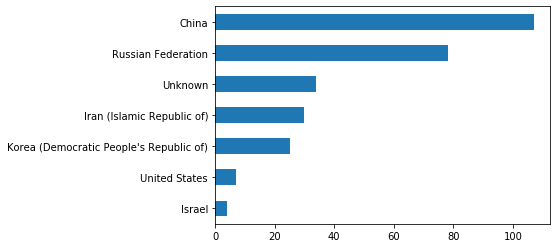

In [20]:
plt = first.Sponsor.value_counts().sort_values(ascending=True).tail(7).plot(kind="barh")

In [21]:
countries = ["China","Russian Federation","Unknown","Iran (Islamic Republic of)","Korea (Democratic People's Republic of)","United States","Israel"]
top10 = pd.DataFrame(first.Sponsor.value_counts())
top10 = top10.reset_index()
top10 = top10.rename(index=str, columns={"index": "country"})
top10.loc[~top10.country.isin(countries), 'country'] = "other"
top10 = top10.groupby('country').sum()
top10 = pd.DataFrame(top10.Sponsor.sort_values(ascending=False))
top10

,Sponsor
country,
China,107
Russian Federation,78
Unknown,34
Iran (Islamic Republic of),30
other,28
Korea (Democratic People's Republic of),25
United States,7
Israel,4


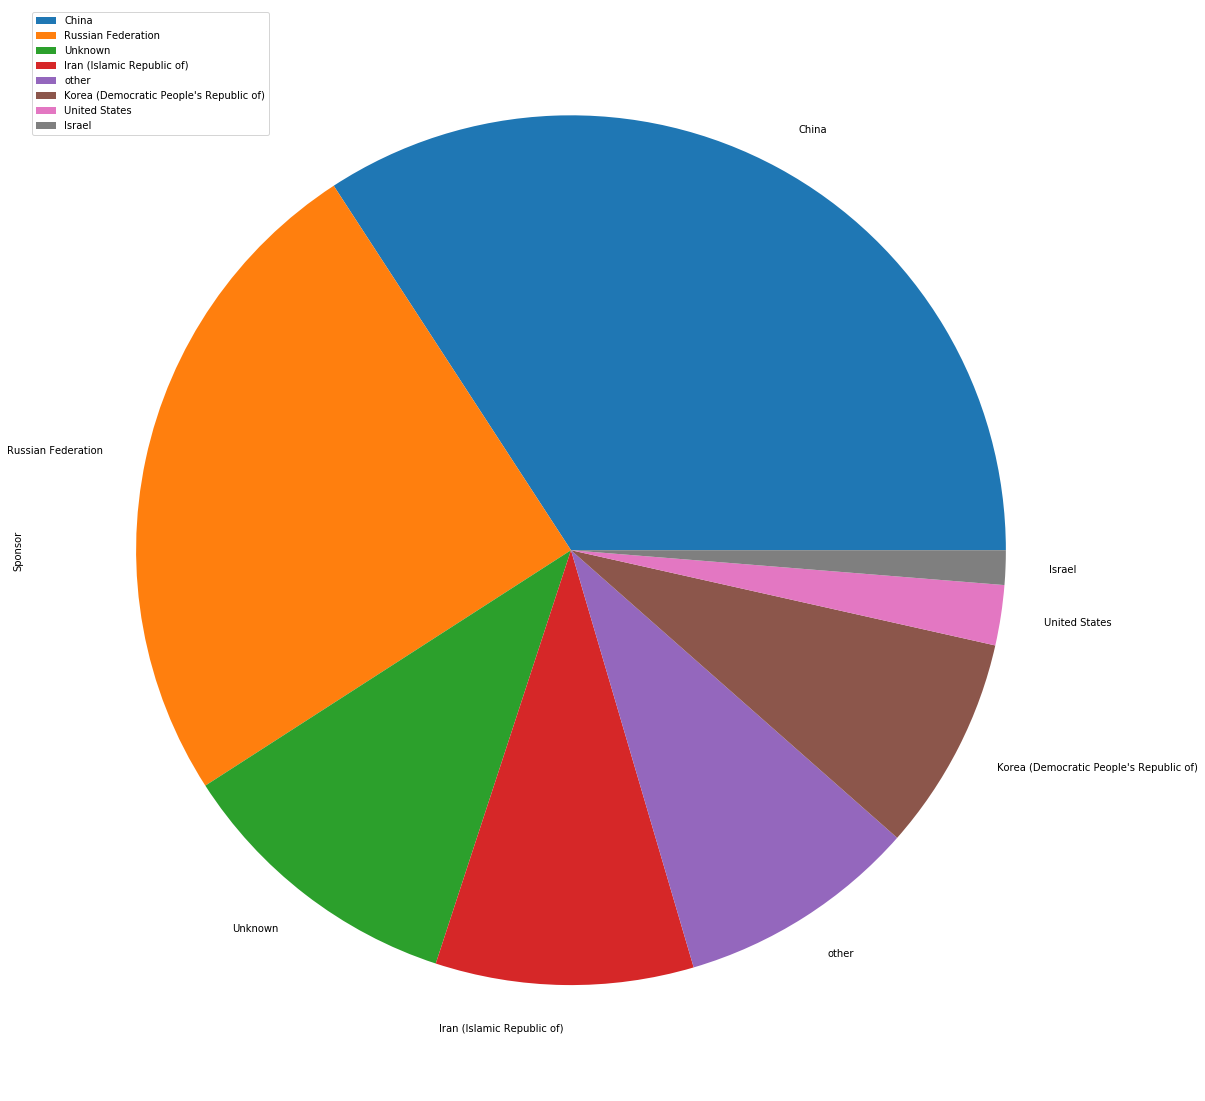

In [22]:
plot = top10.plot.pie(y='Sponsor', figsize=(20, 20))

In [23]:
top_types = pd.DataFrame(first.Type.value_counts().sort_values(ascending=False))
top_types

,Type
Espionage,255
Denial of service,17
Sabotage,15
Uncateogrized,9
Data destruction,8
Doxing,6
Defacement,3


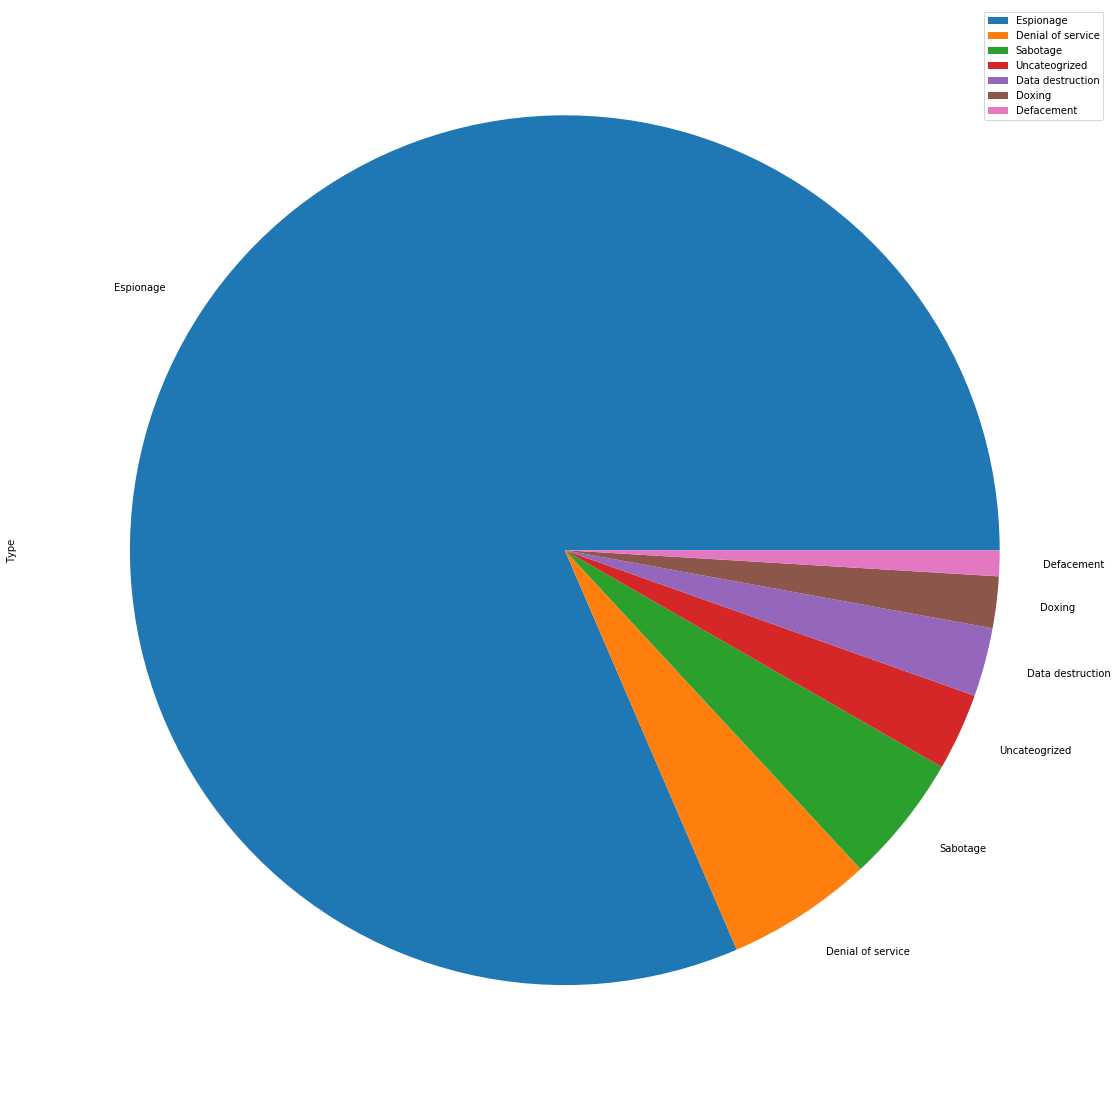

In [24]:
plot = top_types.plot.pie(y='Type', figsize=(20, 20))

In [25]:
top_cats = pd.DataFrame(first.Category.value_counts().sort_values(ascending=False))
categories = ["Private sector","Government","Civil society","Military"]
top_cats = top_cats.reset_index()
top_cats = top_cats.rename(index=str, columns={"index": "sector"})
top_cats.loc[~top_cats.sector.isin(categories), 'sector'] = "cross-sector"
top_cats = top_cats.groupby('sector').sum()
top_cats = pd.DataFrame(top_cats.Category.sort_values(ascending=False))
top_cats

,Category
sector,
cross-sector,105
Private sector,83
Government,72
Civil society,34
Military,19


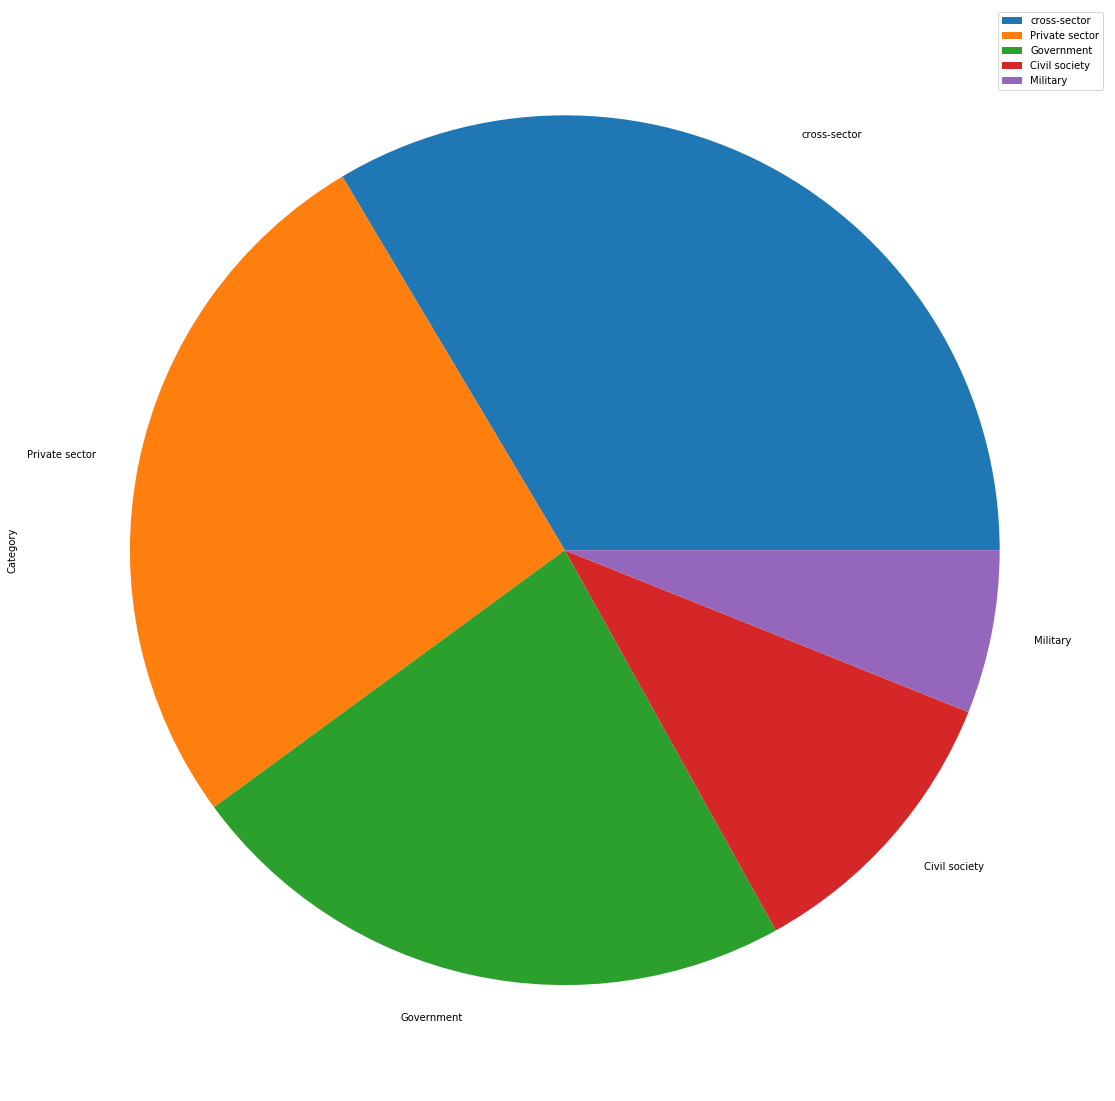

In [26]:
plot = top_cats.plot.pie(y='Category', figsize=(20, 20))

In [156]:
first[first.Victims.isna()]

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3,Year
17,Targeting of foreign ministries,2018-02-28,Believed to be the work of APT 28,A threat actor targeted a foreign ministry in ...,NaN,NaN,Russian Federation,Espionage,Government,https://researchcenter.paloaltonetworks.com/20...,NaN,NaN,2018.0
22,Targeting of a European defense agency,2018-03-15,Believed to be the work of APT 28,A threat actor targeted a European defense age...,NaN,NaN,Russian Federation,Espionage,Government,https://researchcenter.paloaltonetworks.com/20...,NaN,NaN,2018.0
32,Targeting of global financial organizations an...,2018-02-12,Believed to be the work of the Lazarus Group,A threat actor targeted financial organization...,NaN,NaN,Korea (Democratic People's Republic of),Espionage,Private sector,https://securingtomorrow.mcafee.com/mcafee-lab...,NaN,NaN,2018.0
40,Targeting of consulates and embassies in Easte...,2018-01-09,Believed to be the work of Turla,A threat actor targeted consulates and embassi...,NaN,NaN,Russian Federation,Espionage,Government,https://www.welivesecurity.com/wp-content/uplo...,NaN,NaN,2018.0
